In [115]:
import torch
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import numpy as np

In [116]:
TRANSFORMS = [
        transforms.Pad(2),
        transforms.ToTensor(),
    ]

dataset_tranforms = transforms.Compose(TRANSFORMS)

In [117]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=dataset_tranforms)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=dataset_tranforms)

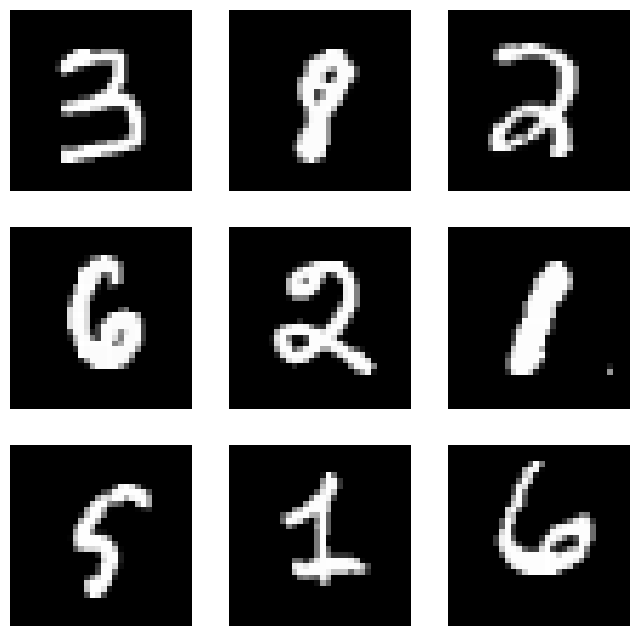

In [118]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist_trainset), size=(1,)).item()
    img, label = mnist_trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [122]:
from data_loading import permute_train_test_data

In [123]:
training_permutations , test_permutations = permute_train_test_data(mnist_trainset,mnist_testset)

TypeError: permute_train_test_data() takes 1 positional argument but 2 were given